`Important Note:` You may find this notebook similar to the official docs of Seaborn. Let me clear here, I have read concepts and learned things from Seaborn Docs because that is pretty good and self-explanatory. This notebook is based on that docs only and it is kinda similar but concise in one place.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

# Introduction

### Important Points

1. I will mostly use pre-loaded data available in seaborn.
2. Please feel free to suggest to me, if I miss any plot :)
3. I will use little matplotlib together to customize plots.

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#### Please let me know in the comment box, How this is useful for you?

# Statistical Relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

## 1. Scatter Plots

A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset.

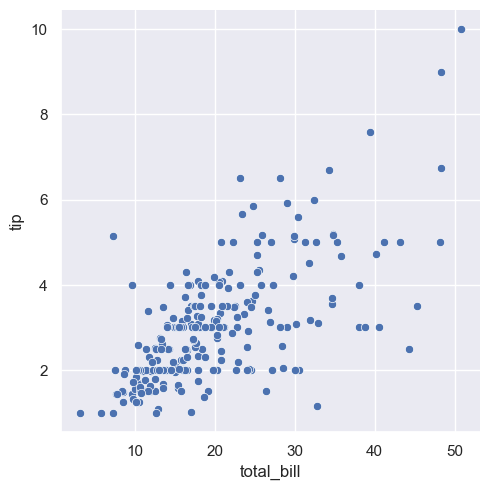

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip",color = 'b', data=tips);

> While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

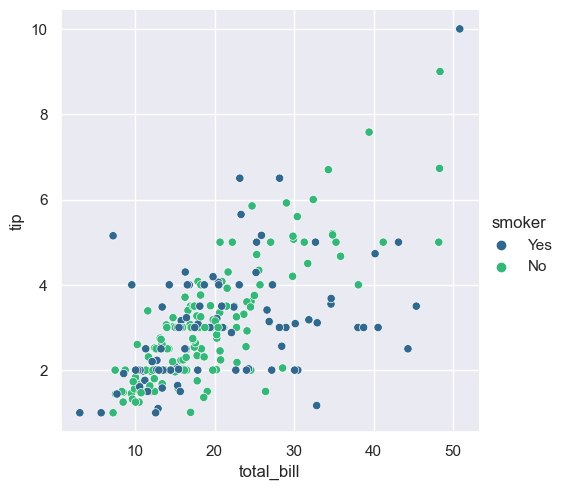

In [3]:
sns.relplot(x="total_bill", y="tip", hue="smoker",palette = 'viridis', data=tips);

> To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

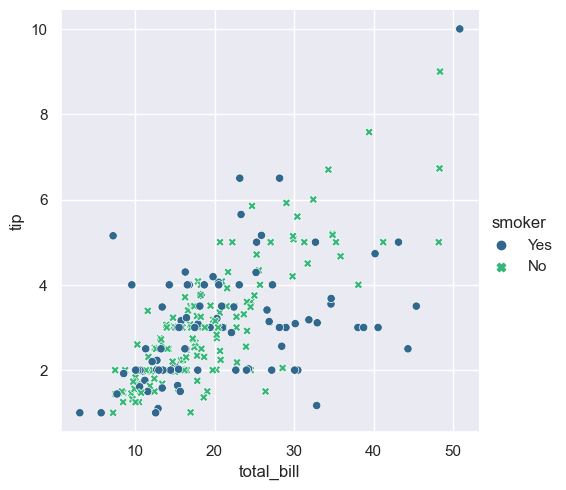

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips,palette = 'viridis');

> It’s also possible to represent four variables by changing the hue and style of each point independently.

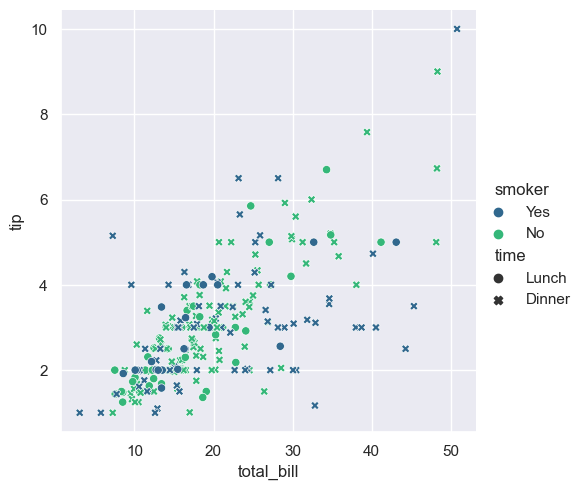

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips,palette = 'viridis');

> If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

[Learn more about sequential palette here](https://seaborn.pydata.org/tutorial/color_palettes.html#sequential-color-palettes)

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

> The third kind of semantic variable changes the size of each point:

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

> This range of sizes can be customized by providing ranges to sizes parameter:

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

## 2.Line Plots

A line chart or line plot or line graph or curve chart is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments. A line chart is often used to visualize a trend in data over intervals of time – a time series

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

In [ ]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

g = sns.relplot(x="time", y="value", kind="line", data=df)

g.fig.autofmt_xdate()

> Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

In [ ]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

### Aggregation and Representing Uncertainty

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

In [ ]:
fmri = pd.read_csv('../input/myprivatedata/fmri.csv')
fmri.head()

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri,color = 'blue');

> The confidence intervals can be time-intensive for larger datasets. It’s therefore possible to disable them:

In [ ]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line",color='blue', data=fmri);

> Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

> To turn off aggregation altogether, set the estimator parameter to None. This might produce a strange effect when the data have multiple observations at each point.

In [ ]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

### Semantic Mappings

The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements.

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

> Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

> But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

> Even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

>The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric:

In [ ]:
dots = pd.read_csv('../input/myprivatedata/dots.csv').query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

> It may happen that, even though the hue variable is numeric, it is poorly represented by a linear color scale. That’s the case here, where the levels of the hue variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary:

In [ ]:
palette = sns.cubehelix_palette(light=0.6, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

### Plotting with Date Data

Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

In [ ]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Facets

This means that you make multiple axes and plot subsets of the data on each of them:

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips,palette='viridis');

> You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event",palette = 'viridis', height=3,
            kind="line", estimator=None, data=fmri);

> When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,palette = 'viridis',
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

# Categorical Data

If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization. There are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

> Categorical scatterplots:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

> Categorical distribution plots:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

> Categorical estimate plots:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

In [ ]:
sns.set(style="ticks", color_codes=True)

## Categorical Scatterplots

The default representation of the data in catplot() uses a scatterplot. 

In [ ]:
sns.catplot(x="day", y="total_bill", data=tips, jitter = True);

> The jitter parameter controls the magnitude of jitter or disables it altogether:

In [ ]:
sns.catplot(x="day", y="total_bill", data=tips, jitter = False);

> The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot(), which is activated by setting kind="swarm" in catplot():

In [ ]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

> Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. (The categorical plots do not currently support size or style semantics). Each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

> Unlike with numerical data, it is not always obvious how to order the levels of the categorical variable along its axis. In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas Categorical datatype, then the default order of the categories can be set there. If the variable passed to the categorical axis looks numerical, the levels will be sorted. But the data are still treated as categorical and drawn at ordinal positions on the categorical axes (specifically, at 0, 1, …) even when numbers are used to label them:

In [ ]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

> The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the order parameter.

In [ ]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

> I have referred to the idea of “categorical axis”. In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories).

In [ ]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

## Distributions of Observations within Categories

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

### Boxplots

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

In [ ]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

> When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

> This behavior is called “dodging” and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging:

In [ ]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

> A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

In [ ]:
diamonds = pd.read_csv('../input/myprivatedata/diamonds.csv')
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

### Violinplots

A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

In [ ]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips);

> It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

> It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

In [ ]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

## Statistical Estimation within Categories

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values.

### Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

In [ ]:
titanic = pd.read_csv('../input/myprivatedata/titanic.csv')
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

> A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

In [ ]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

In [ ]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

### Point plots

An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes:

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

>While the categorical functions lack the style semantic of the relational functions, it can still be a good idea to vary the marker and/or linestyle along with the hue to make figures that are maximally accessible and reproduce well in black and white:

In [ ]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

## Plotting “wide-form” data

While using “long-form” or “tidy” data is preferred, these functions can also by applied to “wide-form” data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the data parameter:

In [ ]:
iris = pd.read_csv('../input/myprivatedata/iris.csv')
sns.catplot(data=iris, orient="h", kind="box");

> Additionally, the axes-level functions accept vectors of Pandas or numpy objects rather than variables in a DataFrame:

In [ ]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

> To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands:

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

### Showing multiple relationships with facets

Just like relplot(), the fact that catplot() is built on a FacetGrid means that it is easy to add faceting variables to visualize higher-dimensional relationships:

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

In [ ]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

# Distribution Visuals

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed.

In [ ]:
from scipy import stats
sns.set(color_codes=True)

## Plotting Univariate Distributions

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

In [ ]:
x = np.random.normal(size=100)
sns.distplot(x);

## Histograms

Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

In [ ]:
sns.distplot(x, kde=False, rug=True);

> When drawing histograms, the main choice you have is the number of bins to use and where to place them. distplot() uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

In [ ]:
sns.distplot(x, bins=20, kde=False, rug=True);

## Kernel density estimation

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

In [ ]:
sns.distplot(x, hist=False, rug=True);

> Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

In [ ]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

> Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

In [ ]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

> We can see that if we use the kdeplot() function in seaborn, we get the same curve. This function is used by distplot(), but it provides a more direct interface with easier access to other options when you just want the density estimate:

In [ ]:
sns.kdeplot(x, shade=True);

> The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

In [ ]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

> As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It’s possible to control how far past the extreme values the curve is drawn with the cut parameter; however, this only influences how the curve is drawn and not how it is fit:

In [ ]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

## Plotting bivariate distributions

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [ ]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

## Scatterplots

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values.

In [ ]:
sns.jointplot(x="x", y="y", data=df);

## Hexbin plots

A bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets.

In [ ]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

## Kernel density estimation

It is also possible to use the kernel density estimation procedure described above to visualize a bivariate distribution.

In [ ]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

> You can also draw a two-dimensional kernel density plot with the kdeplot() function. This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the jointplot() function manages its own figure:

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

> If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

> The jointplot() function uses a JointGrid to manage the figure. For more flexibility, you may want to draw your figure by using JointGrid directly. jointplot() returns the JointGrid object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

In [ ]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Pairwise Relationships

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

In [ ]:
sns.pairplot(iris);

> Specifying the hue parameter automatically changes the histograms to KDE plots to facilitate comparisons between multiple distributions.

In [ ]:
sns.pairplot(iris, hue="species");

> Much like the relationship between jointplot() and JointGrid, the pairplot() function is built on top of a PairGrid object, which can be used directly for more flexibility:

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# Linear Relationships

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We previously discussed functions that can accomplish this by showing the joint distribution of two variables. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. 

>Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality.

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips);

> It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

In [ ]:
sns.lmplot(x="size", y="tip", data=tips);

> One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

> A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Fitting different kinds of models

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets.

In [ ]:
anscombe = pd.read_csv('../input/myprivatedata/anscombe.csv')
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

> The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

> In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

> A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

> In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

> When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

In [ ]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

> The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

In [ ]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

> Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ci=None).

>An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

> The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

In [ ]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

> If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

In [ ]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## regplot() VS lmplot()

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?” This is where the difference between regplot() and lmplot() appears. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

> In addition to color, it’s possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used:

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

> To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid:

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## Controlling the Size and Shape of the Plot

In [ ]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

> In contrast, the size and shape of the lmplot() figure is controlled through the FacetGrid interface using the height and aspect parameters, which apply to each facet in the plot, not to the overall figure itself:

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3);

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

#  Multi-Plot Grids

When exploring medium-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either “lattice” or “trellis” plotting, and it is related to the idea of “small multiples”. It allows a viewer to quickly extract a large amount of information about complex data.

In [ ]:
sns.set(style="ticks")

## Conditional Small Multiples

The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

In [ ]:
g = sns.FacetGrid(tips, col="time")

> Initializing the grid like this sets up the matplotlib figure and axes, but doesn’t draw anything on them.

In [ ]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

> To make a relational plot, just pass multiple variable names. You can also provide keyword arguments, which will be passed to the plotting function:

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

> There are several options for controlling the look of the grid that can be passed to the class constructor.

In [ ]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

> Note that margin_titles isn’t formally supported by the matplotlib API, and may not work well in all cases. In particular, it currently can’t be used with a legend that lies outside of the plot.

>The size of the figure is set by providing the height of each facet, along with the aspect ratio:

In [ ]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

> The default ordering of the facets is derived from the information in the DataFrame. If the variable used to define facets has a categorical type, then the order of the categories is used. Otherwise, the facets will be in the order of appearance of the category levels. It is possible, however, to specify an ordering of any facet dimension with the appropriate *_order parameter:

In [ ]:
ordered_days = tips.day.value_counts().index

g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)

g.map(sns.distplot, "total_bill", hist=False, rug=True);

> Any seaborn color palette (i.e., something that can be passed to color_palette() can be provided. You can also use a dictionary that maps the names of values in the hue variable to valid matplotlib colors:

In [ ]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

> You can also let other aspects of the plot vary across levels of the hue variable, which can be helpful for making plots that will be more comprehensible when printed in black-and-white. To do this, pass a dictionary to hue_kws where keys are the names of plotting function keyword arguments and values are lists of keyword values, one for each level of the hue variable.

In [ ]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

> If you have many levels of one variable, you can plot it along the columns but “wrap” them so that they span multiple rows. When doing this, you cannot use a row variable.

In [ ]:
attend = pd.read_csv('../input/myprivatedata/attention.csv').query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);

> Once you’ve drawn a plot using FacetGrid.map() (which can be called multiple times), you may want to adjust some aspects of the plot. There are also a number of methods on the FacetGrid object for manipulating the figure at a higher level of abstraction. The most general is FacetGrid.set(), and there are other more specialized methods like FacetGrid.set_axis_labels(), which respects the fact that interior facets do not have axis labels. For example:

In [ ]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

> For even more customization, you can work directly with the underling matplotlib Figure and Axes objects, which are stored as member attributes at fig and axes (a two-dimensional array), respectively. When making a figure without row or column faceting, you can also use the ax attribute to directly access the single axes.

In [ ]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

## Using Custom Functions

You’re not limited to existing matplotlib and seaborn functions when using FacetGrid. However, to work properly, any function you use must follow a few rules:

> It must plot onto the “currently active” matplotlib Axes. This will be true of functions in the matplotlib.pyplot namespace, and you can call matplotlib.pyplot.gca() to get a reference to the current Axes if you want to work directly with its methods.

> It must accept the data that it plots in positional arguments. Internally, FacetGrid will pass a Series of data for each of the named positional arguments passed to FacetGrid.map().

> It must be able to accept color and label keyword arguments, and, ideally, it will do something useful with them. In most cases, it’s easiest to catch a generic dictionary of **kwargs and pass it along to the underlying plotting function.

In [ ]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill");

> If we want to make a bivariate plot, you should write the function so that it accepts the x-axis variable first and the y-axis variable second:

In [ ]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip");

> Because matplotlib.pyplot.scatter() accepts color and label keyword arguments and does the right thing with them, we can add a hue facet without any difficulty:

In [ ]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();

In [ ]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend();

> Sometimes, though, you’ll want to map a function that doesn’t work the way you expect with the color and label keyword arguments. In this case, you’ll want to explicitly catch them and handle them in the logic of your custom function. For example, this approach will allow use to map matplotlib.pyplot.hexbin(), which otherwise does not play well with the FacetGrid API:

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

In [ ]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

> By default every numeric column in the dataset is used, but you can focus on particular relationships if you want.

In [ ]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

> It’s also possible to use a different function in the upper and lower triangles to emphasize different aspects of the relationship.

In [ ]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

> You can also control the aesthetics of the plot with keyword arguments, and it returns the PairGrid instance for further tweaking.

In [ ]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)

> *Thank you so much for reading my notebook. I hope this helped you to strengthen your data visualization concept. If you find any difficulty and need some changes in this notebook, Please feel free to reach out to me at ravichaubey.ai@gmail.com or write in a comment below.*